In [0]:
# print('Continue?(1=YES/0=NO)')
# continue_training=bool(int(input()))
continue_training=False

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install -q tensorflow-gpu==2.0.0-beta1
# import logging
# logging.getLogger('tensorflow').disabled = True
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import random
import time
import shutil, os, sys
from collections import deque
from tensorflow.keras import layers, initializers

from IPython import display
from tqdm import tqdm

# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from google.colab import drive
drive.mount('/gdrive')
path = "/gdrive/My Drive/GAN/"
folder = "PGGAN/PGGAN_test2"

     |████████████████████████████████| 348.9MB 59kB/s 
     |████████████████████████████████| 3.1MB 36.1MB/s 
     |████████████████████████████████| 501kB 51.4MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
imgs = []
files = os.listdir(path+"pokemon/")
random.shuffle(files)
file_range = 10 if len(files)-1 > 4000 else len(files)-1
for i in tqdm(range(0, file_range)):
    img = mpimg.imread(path+"pokemon/"+str(files[i]))
    imgs.append(img)

def resize(images, size, BATCH_SIZE):
    i_list = []
#     for i in tqdm(images):
    for i in images:
        i = cv2.resize(i, (size, size), interpolation = cv2.INTER_AREA)
        i_list.append(i)


    train_images = np.array(i_list).astype('float32')
    train_images = train_images / 255
    BUFFER_SIZE = 60000
    train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    return train_dataset
    

100%|██████████| 868/868 [04:51<00:00,  1.74it/s]


In [0]:
class VAE_model(tf.keras.Model):
#     @tf.function
    def __init__(self):
        super(VAE_model, self).__init__()
        
        
        self.relu = layers.LeakyReLU(0.2)
        self.pool = layers.AveragePooling2D(strides=2, padding='same')
        
        
        self.layer_input_512x512 = layers.Conv2D(16, (1, 1), strides=1, padding='same', name='VAE_input_512x512', kernel_initializer=initializers.he_normal())
        self.layer_512x512 = layers.Conv2D(16, (3, 3), strides=1, padding='same', name='VAE_512x512', kernel_initializer=initializers.he_normal())
        self.layer_512x512(self.layer_input_512x512(tf.zeros((1, 512, 512, 3))))
        
        
        self.layer_input_256x256 = layers.Conv2D(16, (1, 1), strides=1, padding='same', name='VAE_input_256x256', kernel_initializer=initializers.he_normal())
        self.layer_256x256 = layers.Conv2D(32, (3, 3), strides=1, padding='same', name='VAE_256x256', kernel_initializer=initializers.he_normal())
        self.layer_256x256(self.layer_input_256x256(tf.zeros((1, 256, 256, 3))))
        
        
        self.layer_input_128x128 = layers.Conv2D(32, (1, 1), strides=1, padding='same', name='VAE_input_128x128', kernel_initializer=initializers.he_normal())
        self.layer_128x128 = layers.Conv2D(32, (3, 3), strides=1, padding='same', name='VAE_128x128', kernel_initializer=initializers.he_normal())
        self.layer_128x128(self.layer_input_128x128(tf.zeros((1, 128, 128, 3))))
        
        
        self.layer_input_64x64 = layers.Conv2D(32, (1, 1), strides=1, padding='same', name='VAE_input_64x64', kernel_initializer=initializers.he_normal())
        self.layer_64x64 = layers.Conv2D(64, (3, 3), strides=1, padding='same', name='VAE_64x64', kernel_initializer=initializers.he_normal())
        self.layer_64x64(self.layer_input_64x64(tf.zeros((1, 64, 64, 3))))
        
        
        self.layer_input_32x32 = layers.Conv2D(64, (1, 1), strides=1, padding='same', name='VAE_input_32x32', kernel_initializer=initializers.he_normal())
        self.layer_32x32 = layers.Conv2D(64, (3, 3), strides=1, padding='same', name='VAE_32x32', kernel_initializer=initializers.he_normal())
        self.layer_32x32(self.layer_input_32x32(tf.zeros((1, 32, 32, 3))))
        
        
        self.layer_input_16x16 = layers.Conv2D(64, (1, 1), strides=1, padding='same', name='VAE_input_16x16', kernel_initializer=initializers.he_normal())
        self.layer_16x16 = layers.Conv2D(128, (3, 3), strides=1, padding='same', name='VAE_16x16', kernel_initializer=initializers.he_normal())
        self.layer_16x16(self.layer_input_16x16(tf.zeros((1, 16, 16, 3))))
        
        
        self.layer_input_8x8 = layers.Conv2D(128, (1, 1), strides=1, padding='same', name='VAE_input_8x8', kernel_initializer=initializers.he_normal())
        self.layer_8x8 = layers.Conv2D(128, (3, 3), strides=1, padding='same', name='VAE_8x8', kernel_initializer=initializers.he_normal())
        self.layer_8x8(self.layer_input_8x8(tf.zeros((1, 8, 8, 3))))
        
        
        self.layer_input_4x4 = layers.Conv2D(128, (1, 1), strides=1, padding='same', name='VAE_input_4x4', kernel_initializer=initializers.he_normal())
        self.layer_4x4 = layers.Conv2D(256, 4, strides=1, padding='same', name='VAE_4x4', kernel_initializer=initializers.he_normal())
        self.layer_4x4(self.layer_input_4x4(tf.zeros((1, 4, 4, 3))))
        
        
        self.flatten = layers.Flatten()
        self.layer_out = layers.Dense(200, name='VAE_dense')
        self.layer_out(tf.zeros((1, 4096)))
        
        
        self.fader = tf.Variable(1, name='fader', dtype=tf.float32, trainable=False)
        self.models = [self.model_4x4, self.model_8x8, self.model_16x16, self.model_32x32, self.model_64x64, self.model_128x128, self.model_256x256, self.model_256x256]
    
    
    

    class Equalized_Learning_Rate(tf.keras.constraints.Constraint):
        @tf.function
        def __call__(self, w):
            fan_in = tf.reduce_prod(w.shape[:-1])
            c = tf.dtypes.cast(tf.sqrt(2/fan_in), tf.float32)
            return w * c
        
        
    @tf.function
    def model_4x4_main(self, inputs):
        x = self.layer_4x4(inputs)
        x = self.relu(x)
        
        x = self.flatten(x)
        x = self.layer_out(x)
        
        mean, logvar = tf.split(x, num_or_size_splits=2, axis=1)
        eps = tf.random.normal(shape=mean.shape)
        x = eps * tf.exp(logvar * .5) + mean
        
        return x, mean, logvar
    
    
    @tf.function
    def model_8x8_main(self, inputs):
        x = self.layer_8x8(inputs)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.model_4x4_main(x)
        return x
        
    @tf.function
    def model_16x16_main(self, inputs):
        x = self.layer_16x16(inputs)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.model_8x8_main(x)
        return x
        
    @tf.function
    def model_32x32_main(self, inputs):
        x = self.layer_32x32(inputs)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.model_16x16_main(x)
        return x
        
    @tf.function
    def model_64x64_main(self, inputs):
        x = self.layer_64x64(inputs)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.model_32x32_main(x)
        return x
        
    @tf.function
    def model_128x128_main(self, inputs):
        x = self.layer_128x128(inputs)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.model_64x64_main(x)
        return x
        
    @tf.function
    def model_256x256_main(self, inputs):
        x = self.layer_256x256(inputs)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.model_128x128_main(x)
        return x
        
        
        
        
    @tf.function
    def model_4x4(self, inputs):
        x = self.layer_input_4x4(inputs)
        x = self.relu(x)
        x = self.model_4x4_main(x)
        return x
     
    @tf.function   
    def model_8x8(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_4x4(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_8x8(inputs)
        x = self.relu(x)
        x = self.layer_8x8(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        x = x + old
        
        
        x = self.model_4x4_main(x)
        return x
       
    @tf.function 
    def model_16x16(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_8x8(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_16x16(inputs)
        x = self.relu(x)
        x = self.layer_16x16(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        x = x + old
        
        
        x = self.model_8x8_main(x)
        return x
     
    @tf.function   
    def model_32x32(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_16x16(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_32x32(inputs)
        x = self.relu(x)
        x = self.layer_32x32(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        
        x = x + old
        
        
        x = self.model_16x16_main(x)
        return x
        
    @tf.function
    def model_64x64(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_32x32(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_64x64(inputs)
        x = self.relu(x)
        x = self.layer_64x64(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        
        x = x + old
        
        
        x = self.model_32x32_main(x)
        return x
        
    @tf.function
    def model_128x128(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_64x64(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_128x128(inputs)        
        x = self.relu(x)
        x = self.layer_128x128(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        
        x = x + old
        
        
        x = self.model_64x64_main(x)
        return x
        
    @tf.function
    def model_256x256(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_128x128(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_256x256(inputs)        
        x = self.relu(x)
        x = self.layer_256x256(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        
        x = x + old
        
        
        x = self.model_128x128_main(x)
        return x
        
    @tf.function
    def model_512x512(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_256x256(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_512x512(inputs)
        x = self.relu(x)
        x = self.layer_512x512(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        
        x = x + old
        
        
        x = self.model_256x256_main(x)
        return x
        
    
    
    

VAE = VAE_model()

In [0]:
# print([w.name for w in VAE.trainable_variables])

In [0]:
class generator_model(tf.keras.Model):
#     @tf.function
    def __init__(self):
        super(generator_model, self).__init__()
        
        self.relu = layers.LeakyReLU(0.2)
        self.sigmoid = layers.Activation('sigmoid')
        self.layer_upsample = layers.UpSampling2D()
        
        self.layer_dense = layers.Dense(4*4*256, name='gen_dense')
        self.reshape_4x4 = layers.Reshape((4, 4, 256))
        self.layer_out_4x4 = layers.Conv2D(3, (1, 1), strides=1, padding='same', name='gen_out_4x4', kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_4x4(self.reshape_4x4(self.layer_dense(tf.zeros((1, 100)))))
        
        
        self.layer_8x8 = layers.Conv2D(128, (3, 3), strides=1, padding='same', name='gen_8x8', kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_8x8 = layers.Conv2D(3, (1, 1), strides=1, padding='same', name='gen_out_8x8', kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_8x8(self.layer_8x8(tf.zeros((1, 4, 4, 256))))
        

        self.layer_16x16 = layers.Conv2D(128, (3, 3), strides=1, padding='same', name='gen_16x16', kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_16x16 = layers.Conv2D(3, (1, 1), strides=1, padding='same', name='gen_out_16x16', kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_16x16(self.layer_16x16(tf.zeros((1, 8, 8, 128))))
        

        self.layer_32x32 = layers.Conv2D(64, (3, 3), strides=1, padding='same', name='gen_32x32', kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_32x32 = layers.Conv2D(3, (1, 1), strides=1, padding='same', name='gen_out_32x32', kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_32x32(self.layer_32x32(tf.zeros((1, 16, 16, 128))))


        self.layer_64x64 = layers.Conv2D(64, (3, 3), strides=1, padding='same', name='gen_64x64', kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_64x64 = layers.Conv2D(3, (1, 1), strides=1, padding='same', name='gen_out_64x64', kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_64x64(self.layer_64x64(tf.zeros((1, 32, 32, 64))))


        self.layer_128x128 = layers.Conv2D(32, (3, 3), strides=1, padding='same', name='gen_128x128', kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_128x128 = layers.Conv2D(3, (1, 1), strides=1, padding='same', name='gen_out_128x128', kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_128x128(self.layer_128x128(tf.zeros((1, 64, 64, 64))))


        self.layer_256x256 = layers.Conv2D(32, (3, 3), strides=1, padding='same', name='gen_256x256', kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_256x256 = layers.Conv2D(3, (1, 1), strides=1, padding='same', name='gen_out_256x256', kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_256x256(self.layer_256x256(tf.zeros((1, 128, 128, 32))))


        self.layer_512x512 = layers.Conv2D(16, (3, 3), strides=1, padding='same', name='gen_512x512', kernel_initializer=tf.random_uniform_initializer(minval=0, maxval=1))#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_512x512 = layers.Conv2D(3, (1, 1), strides=1, padding='same', name='gen_out_512x512', kernel_initializer=tf.random_uniform_initializer(minval=0, maxval=1))#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_out_512x512(self.layer_512x512(tf.zeros((1, 256, 256, 32))))

        
        self.op = tf.keras.optimizers.Adam(learning_rate=1e-4)#, beta_1=0.5)
        self.fader = tf.Variable(1, name='fader', dtype=tf.float32, trainable=False)
        
        
        self.models = [self.model_4x4, self.model_8x8, self.model_16x16, self.model_32x32, self.model_64x64, self.model_128x128, self.model_256x256, self.model_256x256]

    
    
    
    class Equalized_Learning_Rate(tf.keras.constraints.Constraint):
        def __call__(self, w):
            fan_in = tf.reduce_prod(w.shape[:3])
            c = tf.dtypes.cast(tf.sqrt(2/fan_in), tf.float32)
            return w * c
        
        
    @tf.function
    def pixelwise_feat_norm(self, inputs):
        normalization_constant = tf.sqrt(tf.reduce_mean(inputs**2, axis=-1, keepdims=True) + 1.0e-8)
        return inputs / normalization_constant
    
    
    def get_weights(self, w_names):
        w_list = self.trainable_variables
        new_w_list = set()
        for name in w_names:
            for w in w_list:
                if name in w.name:
                    new_w_list.add(w)
        return list(new_w_list)
        
        
    @tf.function
    def model_4x4_main(self, inputs):
        main = self.layer_dense(inputs)
        main = self.relu(main)
        main = self.reshape_4x4(main)
        main = self.pixelwise_feat_norm(main)
        return main      
        
    @tf.function
    def model_8x8_main(self, inputs):
        main = self.model_4x4_main(inputs)
        main = self.layer_upsample(main)
        main = self.layer_8x8(main)
        main = self.relu(main)
        main = self.pixelwise_feat_norm(main)
        return main     
        
    @tf.function
    def model_16x16_main(self, inputs):
        main = self.model_8x8_main(inputs)
        main = self.layer_upsample(main)
        main = self.layer_16x16(main)
        main = self.relu(main)
        main = self.pixelwise_feat_norm(main)
        return main     
        
    @tf.function
    def model_32x32_main(self, inputs):
        main = self.model_16x16_main(inputs)
        main = self.layer_upsample(main)
        main = self.layer_32x32(main)
        main = self.relu(main)
        main = self.pixelwise_feat_norm(main)
        return main     
        
    @tf.function
    def model_64x64_main(self, inputs):
        main = self.model_32x32_main(inputs)
        main = self.layer_upsample(main)
        main = self.layer_64x64(main)
        main = self.relu(main)
        main = self.pixelwise_feat_norm(main)
        return main     
        
    @tf.function
    def model_128x128_main(self, inputs):
        main = self.model_64x64_main(inputs)
        main = self.layer_upsample(main)
        main = self.layer_128x128(main)
        main = self.relu(main)
        main = self.pixelwise_feat_norm(main)
        return main     
        
    @tf.function
    def model_256x256_main(self, inputs):
        main = self.model_128x128_main(inputs)
        main = self.layer_upsample(main)
        main = self.layer_256x256(main)
        main = self.relu(main)
        main = self.pixelwise_feat_norm(main)
        return main
    
        
        
    @tf.function
    def model_4x4(self, inputs):
        main = self.model_4x4_main(inputs)
        to_rgb = self.layer_out_4x4(main)
        
        return to_rgb

    @tf.function
    def model_8x8(self, inputs):
        main = self.model_4x4_main(inputs)
        old_rgb = self.layer_out_4x4(main)
        old_rgb = self.layer_upsample(old_rgb)
        old_rgb = old_rgb * 1-self.fader
        
        main = self.layer_upsample(main)
        main = self.layer_8x8(main)
        main = self.relu(main)
        main = self.pixelwise_feat_norm(main)
        to_rgb = self.layer_out_8x8(main)
        to_rgb = to_rgb * self.fader
        
        to_rgb = to_rgb + old_rgb
        
        return to_rgb
        
    @tf.function
    def model_16x16(self, inputs):
        main = self.model_8x8_main(inputs)
        old_rgb = self.layer_out_8x8(main)
        old_rgb = self.layer_upsample(old_rgb)
        old_rgb = old_rgb * 1-self.fader
        
        main = self.layer_upsample(main)
        main = self.layer_16x16(main)
        main = self.relu(main)
        main = self.pixelwise_feat_norm(main)
        to_rgb = self.layer_out_16x16(main)
        to_rgb = to_rgb * self.fader
        
        to_rgb = to_rgb + old_rgb
        
        return to_rgb
        
    @tf.function
    def model_32x32(self, inputs):
        main = self.model_16x16_main(inputs)
        old_rgb = self.layer_out_16x16(main)
        old_rgb = self.layer_upsample(old_rgb)
        old_rgb = old_rgb * 1-self.fader
        
        main = self.layer_upsample(main)
        main = self.layer_32x32(main)
        main = self.relu(main)
        main = self.pixelwise_feat_norm(main)
        to_rgb = self.layer_out_32x32(main)
        to_rgb = to_rgb * self.fader
        
        to_rgb = to_rgb + old_rgb
        
        return to_rgb
        
    @tf.function
    def model_64x64(self, inputs):
        main = self.model_32x32_main(inputs)
        old_rgb = self.layer_out_32x32(main)
        old_rgb = self.layer_upsample(old_rgb)
        old_rgb = old_rgb * 1-self.fader
        
        main = self.layer_upsample(main)
        main = self.layer_64x64(main)
        main = self.relu(main)
        main = self.pixelwise_feat_norm(main)
        to_rgb = self.layer_out_64x64(main)
        to_rgb = to_rgb * self.fader
        
        to_rgb = to_rgb + old_rgb
        
        return to_rgb
        
    @tf.function
    def model_128x128(self, inputs):
        main = self.model_64x64_main(inputs)
        old_rgb = self.layer_out_64x64(main)
        old_rgb = self.layer_upsample(old_rgb)
        old_rgb = old_rgb * 1-self.fader
        
        main = self.layer_upsample(main)
        main = self.layer_128x128(main)
        main = self.relu(main)
        main = self.pixelwise_feat_norm(main)
        to_rgb = self.layer_out_128x128(main)
        to_rgb = to_rgb * self.fader
        
        to_rgb = to_rgb + old_rgb
        
        return to_rgb
       
    @tf.function 
    def model_256x256(self, inputs):
        main = self.model_128x128_main(inputs)
        old_rgb = self.layer_out_128x128(main)
        old_rgb = self.layer_upsample(old_rgb)
        old_rgb = old_rgb * 1-self.fader
        
        main = self.layer_upsample(main)
        main = self.layer_256x256(main)
        main = self.relu(main)
        main = self.pixelwise_feat_norm(main)
        to_rgb = self.layer_out_256x256(main)
        to_rgb = to_rgb * self.fader
        
        to_rgb = to_rgb + old_rgb
        
        return to_rgb
       
    @tf.function 
    def model_512x512(self, inputs):
        main = self.model_256x256_main(inputs)
        old_rgb = self.layer_out_256x256(main)
        old_rgb = self.layer_upsample(old_rgb)
        old_rgb = old_rgb * 1-self.fader
        
        main = self.layer_upsample(main)
        main = self.layer_512x512(main)
        main = self.relu(main)
        main = self.pixelwise_feat_norm(main)
        to_rgb = self.layer_out_512x512(main)
        to_rgb = to_rgb * self.fader
        
        to_rgb = to_rgb + old_rgb
        
        return to_rgb
    
    

generator = generator_model()

In [7]:
# print(generator.layer_out_4x4.trainable_variables[0])
# generator.Equalized_Learning_Rate_runtime(generator.layer_4x4_vars)
# print(VAE.layer_4x4_vars[4])
# print(generator.layer_16x16_vars[1])
# print(generator.temp)
print([w.name for w in generator.trainable_variables])
# print(generator.fader.trainable)

['gen_dense/kernel:0', 'gen_dense/bias:0', 'gen_out_4x4/kernel:0', 'gen_out_4x4/bias:0', 'gen_8x8/kernel:0', 'gen_8x8/bias:0', 'gen_out_8x8/kernel:0', 'gen_out_8x8/bias:0', 'gen_16x16/kernel:0', 'gen_16x16/bias:0', 'gen_out_16x16/kernel:0', 'gen_out_16x16/bias:0', 'gen_32x32/kernel:0', 'gen_32x32/bias:0', 'gen_out_32x32/kernel:0', 'gen_out_32x32/bias:0', 'gen_64x64/kernel:0', 'gen_64x64/bias:0', 'gen_out_64x64/kernel:0', 'gen_out_64x64/bias:0', 'gen_128x128/kernel:0', 'gen_128x128/bias:0', 'gen_out_128x128/kernel:0', 'gen_out_128x128/bias:0', 'gen_256x256/kernel:0', 'gen_256x256/bias:0', 'gen_out_256x256/kernel:0', 'gen_out_256x256/bias:0', 'gen_512x512/kernel:0', 'gen_512x512/bias:0', 'gen_out_512x512/kernel:0', 'gen_out_512x512/bias:0']


In [0]:
class discriminator_model(tf.keras.Model):
#     @tf.function
    def __init__(self):
        super(discriminator_model, self).__init__()
        
        self.relu = layers.LeakyReLU(0.2)
        self.pool = layers.AveragePooling2D(strides=2, padding='same')
        self.gaus_noise = layers.GaussianNoise(0.5)
        self.dropout = layers.Dropout(0.3)
        
        
        self.layer_input_512x512 = layers.Conv2D(16, (1, 1), strides=1, padding='same', name='disc_input_512x512', use_bias=False, kernel_initializer=initializers.he_normal())
        self.layer_512x512 = layers.Conv2D(16, (3, 3), strides=1, padding='same', name='disc_512x512', kernel_initializer=initializers.he_normal())
        self.layer_512x512(self.layer_input_512x512(tf.zeros((1, 512, 512, 3))))
        
        
        self.layer_input_256x256 = layers.Conv2D(16, (1, 1), strides=1, padding='same', name='disc_input_256x256', use_bias=False, kernel_initializer=initializers.he_normal())
        self.layer_256x256 = layers.Conv2D(32, (3, 3), strides=1, padding='same', name='disc_256x256', use_bias=False, kernel_initializer=initializers.he_normal())
        self.layer_256x256(self.layer_input_256x256(tf.zeros((1, 256, 256, 3))))
        
        
        self.layer_input_128x128 = layers.Conv2D(32, (1, 1), strides=1, padding='same', name='disc_input_128x128', use_bias=False, kernel_initializer=initializers.he_normal())
        self.layer_128x128 = layers.Conv2D(32, (3, 3), strides=1, padding='same', name='disc_128x128', use_bias=False, kernel_initializer=initializers.he_normal())
        self.layer_128x128(self.layer_input_128x128(tf.zeros((1, 128, 128, 3))))
        
        
        self.layer_input_64x64 = layers.Conv2D(32, (1, 1), strides=1, padding='same', name='disc_input_64x64', use_bias=False, kernel_initializer=initializers.he_normal())
        self.layer_64x64 = layers.Conv2D(64, (3, 3), strides=1, padding='same', name='disc_64x64', use_bias=False, kernel_initializer=initializers.he_normal())
        self.layer_64x64(self.layer_input_64x64(tf.zeros((1, 64, 64, 3))))
        
        
        self.layer_input_32x32 = layers.Conv2D(64, (1, 1), strides=1, padding='same', name='disc_input_32x32', use_bias=False, kernel_initializer=initializers.he_normal())
        self.layer_32x32 = layers.Conv2D(64, (3, 3), strides=1, padding='same', name='disc_32x32', use_bias=False, kernel_initializer=initializers.he_normal())
        self.layer_32x32(self.layer_input_32x32(tf.zeros((1, 32, 32, 3))))
        
        
        self.layer_input_16x16 = layers.Conv2D(64, (1, 1), strides=1, padding='same', name='disc_input_16x16', use_bias=False, kernel_initializer=initializers.he_normal())
        self.layer_16x16 = layers.Conv2D(128, (3, 3), strides=1, padding='same', name='disc_16x16', use_bias=False, kernel_initializer=initializers.he_normal())
        self.layer_16x16(self.layer_input_16x16(tf.zeros((1, 16, 16, 3))))
        
        
        self.layer_input_8x8 = layers.Conv2D(128, (1, 1), strides=1, padding='same', name='disc_input_8x8', use_bias=False, kernel_initializer=initializers.he_normal())
        self.layer_8x8 = layers.Conv2D(128, (3, 3), strides=1, padding='same', name='disc_8x8', use_bias=False, kernel_initializer=initializers.he_normal())
        self.layer_8x8(self.layer_input_8x8(tf.zeros((1, 8, 8, 3))))
        
        
        self.layer_input_4x4 = layers.Conv2D(128, (1, 1), strides=1, padding='same', name='disc_input_4x4', use_bias=False, kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_4x4 = layers.Conv2D(256, 4, strides=1, padding='same', name='disc_4x4', use_bias=False, kernel_initializer=initializers.he_normal())#, kernel_constraint=self.Equalized_Learning_Rate())
        self.layer_4x4(self.layer_input_4x4(tf.zeros((1, 4, 4, 3))))
        
        
        self.flatten = layers.Flatten()
        self.layer_out = layers.Dense(1, name='disc_dense', use_bias=False)
        self.layer_out(tf.zeros((1, 4096)))
        
        
        self.op = tf.keras.optimizers.Adam(learning_rate=1e-4)#, beta_1=0.5)
        self.fader = tf.Variable(1, name='fader', dtype=tf.float32, trainable=False)
        self.models = [self.model_4x4, self.model_8x8, self.model_16x16, self.model_32x32, self.model_64x64, self.model_128x128, self.model_256x256]
    
    
    class Equalized_Learning_Rate(tf.keras.constraints.Constraint):
        @tf.function
        def __call__(self, w):
            fan_in = tf.reduce_prod(w.shape[:-1])
            c = tf.dtypes.cast(tf.sqrt(2/fan_in), tf.float32)
            return w * c
        
        
    @tf.function
    def model_4x4_main(self, inputs):
        x = self.layer_4x4(inputs)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.flatten(x)
        x = self.layer_out(x)
        return x
        
    @tf.function
    def model_8x8_main(self, inputs):
        x = self.layer_8x8(inputs)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout(x)

        x = self.model_4x4_main(x)
        return x
        
    @tf.function
    def model_16x16_main(self, inputs):
        x = self.layer_16x16(inputs)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout(x)

        x = self.model_8x8_main(x)
        return x
        
    @tf.function
    def model_32x32_main(self, inputs):
        x = self.layer_32x32(inputs)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout(x)

        x = self.model_16x16_main(x)
        return x
        
    @tf.function
    def model_64x64_main(self, inputs):
        x = self.layer_64x64(inputs)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout(x)

        x = self.model_32x32_main(x)
        return x
        
    @tf.function
    def model_128x128_main(self, inputs):
        x = self.layer_128x128(inputs)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout(x)

        x = self.model_64x64_main(x)
        return x
        
    @tf.function
    def model_256x256_main(self, inputs):
        x = self.layer_256x256(inputs)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout(x)

        x = self.model_128x128_main(x)
        return x
        
        
        
        
    @tf.function
    def model_4x4(self, inputs):
        x = self.layer_input_4x4(inputs)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.model_4x4_main(x)
        
        return x
     
    @tf.function   
    def model_8x8(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_4x4(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_8x8(inputs)
        x = self.relu(x)
        x = self.layer_8x8(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        x = x + old
        
        x = self.model_4x4_main(x)
        return x
       
    @tf.function 
    def model_16x16(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_8x8(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_16x16(inputs)
        x = self.relu(x)
        x = self.layer_16x16(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        x = x + old
        
        x = self.model_8x8_main(x)
        return x
     
    @tf.function   
    def model_32x32(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_16x16(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_32x32(inputs)
        x = self.relu(x)
        x = self.layer_32x32(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        
        x = x + old
        
        x = self.model_16x16_main(x)
        return x
        
    @tf.function
    def model_64x64(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_32x32(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_64x64(inputs)
        x = self.relu(x)
        x = self.layer_64x64(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        
        x = x + old
        
        x = self.model_32x32_main(x)
        return x
        
    @tf.function
    def model_128x128(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_64x64(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_128x128(inputs)        
        x = self.relu(x)
        x = self.layer_128x128(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        
        x = x + old

        x = self.model_64x64_main(x)
        return x
        
    @tf.function
    def model_256x256(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_128x128(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_256x256(inputs)        
        x = self.relu(x)
        x = self.layer_256x256(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        
        x = x + old
        
        x = self.model_128x128_main(x)
        return x
        
    @tf.function
    def model_512x512(self, inputs):
        old = self.pool(inputs)
        old = self.layer_input_256x256(old)
        old = self.relu(old)
        old = old * 1-self.fader
        
        x = self.layer_input_512x512(inputs)
        x = self.relu(x)
        x = self.layer_512x512(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x * self.fader
        
        x = x + old
        
        x = self.model_256x256_main(x)
        return x
        
    
    
    

discriminator = discriminator_model()

In [0]:
cross_entropy_logits = tf.keras.losses.BinaryCrossentropy(from_logits=True)#, label_smoothing=0.1)
generator_op = tf.keras.optimizers.Adam(learning_rate=1e-4)#, beta_1=0.5)
discriminator_op = tf.keras.optimizers.Adam(learning_rate=1e-4)#, beta_1=0.5)


@tf.function
def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2. * np.pi)
    return tf.reduce_sum(
        -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
        axis=raxis)

@tf.function
def regulerizer_loss(z, mean, logvar, generated_images, images):
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=generated_images, labels=images)
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
    logpz = log_normal_pdf(z, 0., 0.)
    logqz_x = log_normal_pdf(z, mean, logvar)
    return -tf.reduce_mean(logpx_z + logpz - logqz_x)

@tf.function
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy_logits(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy_logits(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

@tf.function
def generator_loss(fake_output):
    total_loss = cross_entropy_logits(tf.ones_like(fake_output), fake_output)
    return total_loss


In [10]:
noise_dim = 100
num_examples_to_generate = 49


    
seed = tf.Variable(tf.random.normal([num_examples_to_generate, noise_dim]))
step = tf.Variable(0, dtype=tf.int32)
level = tf.Variable(0, dtype=tf.int32)

checkpoint_dir = path + folder +'_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(seed=seed,
                                 step=step,
                                 level=level,
                                 VAE=VAE,
                                 generator=generator,
                                 discriminator=discriminator)



if continue_training:
    while checkpoint.step.numpy() == 0  and checkpoint.level.numpy() == 0:
        checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
    print(checkpoint.level, checkpoint.step)
    print('Loaded!')
else:
    try:
        shutil.rmtree(path+folder+'_imgs/')
    except: pass
    os.mkdir(path+folder+'_imgs')
    try:
        os.mkdir(path+folder+'_checkpoints')
    except: pass
    try:
        os.mkdir(path+folder+'_graphs')
    except: pass
    print(checkpoint.level)
    print('New!')

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0>
New!


In [0]:
@tf.function
def train_step_main(images, i):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        images_with_gaus = discriminator.gaus_noise(images)
        
        z, mean, logvar = VAE.models[i](images)
        
        generated_images = generator.sigmoid(generator.models[i](z))
        generated_images_with_gaus = discriminator.gaus_noise(generated_images)

        
        real_output = discriminator.models[i](images_with_gaus)
        fake_output = discriminator.models[i](generated_images_with_gaus)
        
        
        reg_loss = regulerizer_loss(z, mean, logvar, generated_images_with_gaus, images)
        gen_loss = generator_loss(fake_output)
        total_gen_loss = gen_loss + (0.1*reg_loss)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables+VAE.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    return gradients_of_generator, gradients_of_discriminator, gen_loss, disc_loss
    
    
@tf.function
def train_step_4x4(images):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        images_with_gaus = discriminator.gaus_noise(images)
        
        z, mean, logvar = VAE.model_4x4(images)
        
        generated_images = generator.sigmoid(generator.model_4x4(z))
        generated_images_with_gaus = discriminator.gaus_noise(generated_images)

        
        real_output = discriminator.model_4x4(images_with_gaus)
        fake_output = discriminator.model_4x4(generated_images_with_gaus)
        
        
        reg_loss = regulerizer_loss(z, mean, logvar, generated_images_with_gaus, images)
        gen_loss = generator_loss(fake_output)
        total_gen_loss = gen_loss + (0.1*reg_loss)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables+VAE.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator.op.apply_gradients(zip(gradients_of_generator, generator.trainable_variables+VAE.trainable_variables))
    discriminator.op.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss
    
    
@tf.function
def train_step_8x8(images):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        images_with_gaus = discriminator.gaus_noise(images)
        
        z, mean, logvar = VAE.model_8x8(images)
        
        generated_images = generator.sigmoid(generator.model_8x8(z))
        generated_images_with_gaus = discriminator.gaus_noise(generated_images)

        
        real_output = discriminator.model_8x8(images_with_gaus)
        fake_output = discriminator.model_8x8(generated_images_with_gaus)
        
        
        reg_loss = regulerizer_loss(z, mean, logvar, generated_images_with_gaus, images)
        gen_loss = generator_loss(fake_output)
        total_gen_loss = gen_loss + (0.1*reg_loss)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables+VAE.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator.op.apply_gradients(zip(gradients_of_generator, generator.trainable_variables+VAE.trainable_variables))
    discriminator.op.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss
    
    
@tf.function
def train_step_16x16(images):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        
        images_with_gaus = discriminator.gaus_noise(images)
        
        z, mean, logvar = VAE.model_16x16(images)
        
        generated_images = generator.sigmoid(generator.model_16x16(z))
        generated_images_with_gaus = discriminator.gaus_noise(generated_images)

        
        real_output = discriminator.model_16x16(images_with_gaus)
        fake_output = discriminator.model_16x16(generated_images_with_gaus)
        
        
        reg_loss = regulerizer_loss(z, mean, logvar, generated_images_with_gaus, images)
        gen_loss = generator_loss(fake_output)
        total_gen_loss = gen_loss + (0.1*reg_loss)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables+VAE.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator.op.apply_gradients(zip(gradients_of_generator, generator.trainable_variables+VAE.trainable_variables))
    discriminator.op.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss
    
    
@tf.function
def train_step_32x32(images):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        images_with_gaus = discriminator.gaus_noise(images)
        
        z, mean, logvar = VAE.model_32x32(images)
        
        generated_images = generator.sigmoid(generator.model_32x32(z))
        generated_images_with_gaus = discriminator.gaus_noise(generated_images)

        
        real_output = discriminator.model_32x32(images_with_gaus)
        fake_output = discriminator.model_32x32(generated_images_with_gaus)
        
        
        reg_loss = regulerizer_loss(z, mean, logvar, generated_images_with_gaus, images)
        gen_loss = generator_loss(fake_output)
        total_gen_loss = gen_loss + (0.1*reg_loss)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables+VAE.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator.op.apply_gradients(zip(gradients_of_generator, generator.trainable_variables+VAE.trainable_variables))
    discriminator.op.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss
    
    
@tf.function
def train_step_64x64(images):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        images_with_gaus = discriminator.gaus_noise(images)
        
        z, mean, logvar = VAE.model_64x64(images)
        
        generated_images = generator.sigmoid(generator.model_64x64(z))
        generated_images_with_gaus = discriminator.gaus_noise(generated_images)

        
        real_output = discriminator.model_64x64(images_with_gaus)
        fake_output = discriminator.model_64x64(generated_images_with_gaus)
        
        
        reg_loss = regulerizer_loss(z, mean, logvar, generated_images_with_gaus, images)
        gen_loss = generator_loss(fake_output)
        total_gen_loss = gen_loss + (0.1*reg_loss)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables+VAE.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator.op.apply_gradients(zip(gradients_of_generator, generator.trainable_variables+VAE.trainable_variables))
    discriminator.op.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss
    
    
@tf.function
def train_step_128x128(images):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        images_with_gaus = discriminator.gaus_noise(images)
        
        z, mean, logvar = VAE.model_128x128(images)
        
        generated_images = generator.sigmoid(generator.model_128x128(z))
        generated_images_with_gaus = discriminator.gaus_noise(generated_images)

        
        real_output = discriminator.model_128x128(images_with_gaus)
        fake_output = discriminator.model_128x128(generated_images_with_gaus)
        
        
        reg_loss = regulerizer_loss(z, mean, logvar, generated_images_with_gaus, images)
        gen_loss = generator_loss(fake_output)
        total_gen_loss = gen_loss + (0.1*reg_loss)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables+VAE.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator.op.apply_gradients(zip(gradients_of_generator, generator.trainable_variables+VAE.trainable_variables))
    discriminator.op.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss
    

@tf.function
def train_step_256x256(images):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        images_with_gaus = discriminator.gaus_noise(images)
        
        z, mean, logvar = VAE.model_256x256(images)
        
        generated_images = generator.sigmoid(generator.model_256x256(z))
        generated_images_with_gaus = discriminator.gaus_noise(generated_images)

        
        real_output = discriminator.model_256x256(images_with_gaus)
        fake_output = discriminator.model_256x256(generated_images_with_gaus)
        
        
        reg_loss = regulerizer_loss(z, mean, logvar, generated_images_with_gaus, images)
        gen_loss = generator_loss(fake_output)
        total_gen_loss = gen_loss + (0.1*reg_loss)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables+VAE.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator.op.apply_gradients(zip(gradients_of_generator, generator.trainable_variables+VAE.trainable_variables))
    discriminator.op.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss
    
    
@tf.function
def train_step_512x512(images):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        images_with_gaus = discriminator.gaus_noise(images)
        
        z, mean, logvar = VAE.model_512x512(images)
        
        generated_images = generator.sigmoid(generator.model_512x512(z))
        generated_images_with_gaus = discriminator.gaus_noise(generated_images)

        
        real_output = discriminator.model_512x512(images_with_gaus)
        fake_output = discriminator.model_512x512(generated_images_with_gaus)
        
        
        reg_loss = regulerizer_loss(z, mean, logvar, generated_images_with_gaus, images)
        gen_loss = generator_loss(fake_output)
        total_gen_loss = gen_loss + (0.1*reg_loss)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables+VAE.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator.op.apply_gradients(zip(gradients_of_generator, generator.trainable_variables+VAE.trainable_variables))
    discriminator.op.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss
    

In [0]:
def train(base_epochs=100, base_batchs=128, fade_in=500):
    growing_model = [   (train_step_4x4, generator.model_4x4, 4, int(base_batchs/(2**0)), int(base_epochs)),
                            (train_step_8x8, generator.model_8x8, 8, int(base_batchs/(2**0)), int(base_epochs)),
                            (train_step_16x16, generator.model_16x16, 16, int(base_batchs/(2**0)), int(base_epochs)),
                            (train_step_32x32, generator.model_32x32, 32, int(base_batchs/(2**0)), int(base_epochs)),
                            (train_step_64x64, generator.model_64x64, 64, int(base_batchs/(2**0)), int(base_epochs)),
                            (train_step_128x128, generator.model_128x128, 128, int(base_batchs/(2**1)), int(base_epochs)),
                            (train_step_256x256, generator.model_256x256, 256, int(base_batchs/(2**2)), int(base_epochs))]#,
    #                         (train_step_512x512, generator.model_512x512, 512, int(base_batchs/(2**5)), int(base_epochs))   ]
    
    for i in range(checkpoint.level.numpy(), len(growing_model)):
        (train_step, Gen_model, size, batch_size, epochs) = growing_model[i]
        
        train_dataset = resize(imgs, size, batch_size)
        discriminate_loss_list = deque(maxlen=1000)
        generate_loss_list = deque(maxlen=1000)
        
        for epoch in range(checkpoint.step.numpy(), epochs+1):
            start = time.time()
            gen_epoch_loss = []
            disc_epoch_loss = []
            
            
            if epoch < fade_in:
                VAE.fader.assign(epoch/fade_in)
                generator.fader.assign(epoch/fade_in)
                discriminator.fader.assign(epoch/fade_in)
            else:
                VAE.fader.assign(1)
                generator.fader.assign(1)
                discriminator.fader.assign(1)
                

            for image_batch in train_dataset:
                gradients_of_generator, gradients_of_discriminator, gen_loss, disc_loss = train_step_main(image_batch, i)
                generator.op.apply_gradients(zip(gradients_of_generator, generator.trainable_variables+VAE.trainable_variables))
                discriminator.op.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
                gen_epoch_loss.append(gen_loss)
                disc_epoch_loss.append(disc_loss)
                
            discriminate_loss_list.append(tf.reduce_mean(disc_epoch_loss))
            generate_loss_list.append(tf.reduce_mean(gen_epoch_loss))
            
            if (epoch) % 50 == 0:
                checkpoint.step.assign(epoch)
                checkpoint.level.assign(i)
                checkpoint.save(file_prefix = checkpoint_prefix)
                generate_and_save_images(Gen_model, size, epoch, checkpoint.seed)
                plot_graph_disc_and_gan(discriminate_loss_list, generate_loss_list, size)
                
                
            print ('Time for layer {}, epoch {}, fader {:.1f}% is {:.5f} sec'.format(size, epoch, generator.fader*100, time.time()-start))
        del train_dataset
        
        checkpoint.step.assign(0)
        checkpoint.level.assign(i+1)
        checkpoint.save(file_prefix = checkpoint_prefix)

In [0]:
def generate_and_save_images(model, layer, epoch, test_input):
    
    predictions = generator.sigmoid(model(test_input))

    fig = plt.figure(figsize=(7,7))
    plt.clf()

    for i in range(predictions.shape[0]):
        plt.subplot(7, 7, i+1)
        plt.imshow(predictions[i])
        plt.axis('off')

    plt.savefig(path+folder+'_imgs/image_{:01d}x{:01d}_{:04d}.png'.format(layer, layer, epoch))
    display.clear_output(wait=True)
    print(predictions.shape)
    plt.show()
    

In [0]:
def plot_graph_disc_and_gan(discriminate_loss_list, generate_loss_list, layer):
    plt.clf()
    plt.plot(generate_loss_list, c='g')
    plt.plot(discriminate_loss_list, c='r')
    plt.savefig(path+folder+'_graphs/image_{:01d}x{:01d}.png'.format(layer, layer))
    plt.show()

(49, 16, 16, 3)


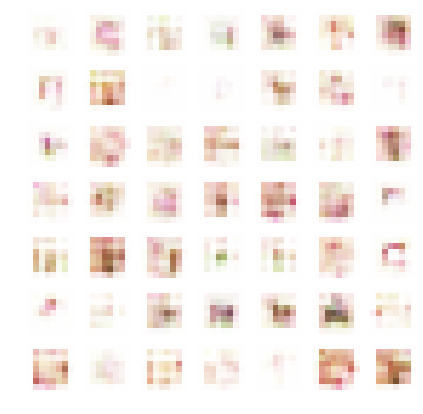

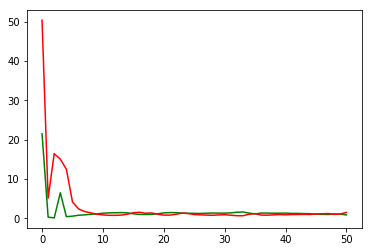

W0724 06:34:12.906122 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['gen_out_4x4/kernel:0', 'gen_out_4x4/bias:0', 'gen_32x32/kernel:0', 'gen_32x32/bias:0', 'gen_out_32x32/kernel:0', 'gen_out_32x32/bias:0', 'gen_64x64/kernel:0', 'gen_64x64/bias:0', 'gen_out_64x64/kernel:0', 'gen_out_64x64/bias:0', 'gen_128x128/kernel:0', 'gen_128x128/bias:0', 'gen_out_128x128/kernel:0', 'gen_out_128x128/bias:0', 'gen_256x256/kernel:0', 'gen_256x256/bias:0', 'gen_out_256x256/kernel:0', 'gen_out_256x256/bias:0', 'gen_512x512/kernel:0', 'gen_512x512/bias:0', 'gen_out_512x512/kernel:0', 'gen_out_512x512/bias:0', 'VAE_input_512x512/kernel:0', 'VAE_input_512x512/bias:0', 'VAE_512x512/kernel:0', 'VAE_512x512/bias:0', 'VAE_input_256x256/kernel:0', 'VAE_input_256x256/bias:0', 'VAE_256x256/kernel:0', 'VAE_256x256/bias:0', 'VAE_input_128x128/kernel:0', 'VAE_input_128x128/bias:0', 'VAE_128x128/kernel:0', 'VAE_128x128/bias:0', 'VAE_input_64x64/kernel:0', 'VAE_input_64x64/bias:0', 'VAE_

Time for layer 16, epoch 50, fader 10.0% is 2.58882 sec


W0724 06:34:13.138756 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['disc_input_512x512/kernel:0', 'disc_512x512/kernel:0', 'disc_512x512/bias:0', 'disc_input_256x256/kernel:0', 'disc_256x256/kernel:0', 'disc_input_128x128/kernel:0', 'disc_128x128/kernel:0', 'disc_input_64x64/kernel:0', 'disc_64x64/kernel:0', 'disc_input_32x32/kernel:0', 'disc_32x32/kernel:0', 'disc_input_4x4/kernel:0'] when minimizing the loss.
W0724 06:34:13.154278 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['gen_out_4x4/kernel:0', 'gen_out_4x4/bias:0', 'gen_32x32/kernel:0', 'gen_32x32/bias:0', 'gen_out_32x32/kernel:0', 'gen_out_32x32/bias:0', 'gen_64x64/kernel:0', 'gen_64x64/bias:0', 'gen_out_64x64/kernel:0', 'gen_out_64x64/bias:0', 'gen_128x128/kernel:0', 'gen_128x128/bias:0', 'gen_out_128x128/kernel:0', 'gen_out_128x128/bias:0', 'gen_256x256/kernel:0', 'gen_256x256/bias:0', 'gen_out_256x256/kernel:0', 'gen_out_256x256/bias:0', 'gen_512x512/kernel:0', 

Time for layer 16, epoch 51, fader 10.2% is 0.53619 sec


W0724 06:34:13.637980 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['gen_out_4x4/kernel:0', 'gen_out_4x4/bias:0', 'gen_32x32/kernel:0', 'gen_32x32/bias:0', 'gen_out_32x32/kernel:0', 'gen_out_32x32/bias:0', 'gen_64x64/kernel:0', 'gen_64x64/bias:0', 'gen_out_64x64/kernel:0', 'gen_out_64x64/bias:0', 'gen_128x128/kernel:0', 'gen_128x128/bias:0', 'gen_out_128x128/kernel:0', 'gen_out_128x128/bias:0', 'gen_256x256/kernel:0', 'gen_256x256/bias:0', 'gen_out_256x256/kernel:0', 'gen_out_256x256/bias:0', 'gen_512x512/kernel:0', 'gen_512x512/bias:0', 'gen_out_512x512/kernel:0', 'gen_out_512x512/bias:0', 'VAE_input_512x512/kernel:0', 'VAE_input_512x512/bias:0', 'VAE_512x512/kernel:0', 'VAE_512x512/bias:0', 'VAE_input_256x256/kernel:0', 'VAE_input_256x256/bias:0', 'VAE_256x256/kernel:0', 'VAE_256x256/bias:0', 'VAE_input_128x128/kernel:0', 'VAE_input_128x128/bias:0', 'VAE_128x128/kernel:0', 'VAE_128x128/bias:0', 'VAE_input_64x64/kernel:0', 'VAE_input_64x64/bias:0', 'VAE_

Time for layer 16, epoch 52, fader 10.4% is 0.47465 sec


W0724 06:34:14.106471 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['disc_input_512x512/kernel:0', 'disc_512x512/kernel:0', 'disc_512x512/bias:0', 'disc_input_256x256/kernel:0', 'disc_256x256/kernel:0', 'disc_input_128x128/kernel:0', 'disc_128x128/kernel:0', 'disc_input_64x64/kernel:0', 'disc_64x64/kernel:0', 'disc_input_32x32/kernel:0', 'disc_32x32/kernel:0', 'disc_input_4x4/kernel:0'] when minimizing the loss.
W0724 06:34:14.120975 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['gen_out_4x4/kernel:0', 'gen_out_4x4/bias:0', 'gen_32x32/kernel:0', 'gen_32x32/bias:0', 'gen_out_32x32/kernel:0', 'gen_out_32x32/bias:0', 'gen_64x64/kernel:0', 'gen_64x64/bias:0', 'gen_out_64x64/kernel:0', 'gen_out_64x64/bias:0', 'gen_128x128/kernel:0', 'gen_128x128/bias:0', 'gen_out_128x128/kernel:0', 'gen_out_128x128/bias:0', 'gen_256x256/kernel:0', 'gen_256x256/bias:0', 'gen_out_256x256/kernel:0', 'gen_out_256x256/bias:0', 'gen_512x512/kernel:0', 

Time for layer 16, epoch 53, fader 10.6% is 0.48236 sec


W0724 06:34:14.594313 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['gen_out_4x4/kernel:0', 'gen_out_4x4/bias:0', 'gen_32x32/kernel:0', 'gen_32x32/bias:0', 'gen_out_32x32/kernel:0', 'gen_out_32x32/bias:0', 'gen_64x64/kernel:0', 'gen_64x64/bias:0', 'gen_out_64x64/kernel:0', 'gen_out_64x64/bias:0', 'gen_128x128/kernel:0', 'gen_128x128/bias:0', 'gen_out_128x128/kernel:0', 'gen_out_128x128/bias:0', 'gen_256x256/kernel:0', 'gen_256x256/bias:0', 'gen_out_256x256/kernel:0', 'gen_out_256x256/bias:0', 'gen_512x512/kernel:0', 'gen_512x512/bias:0', 'gen_out_512x512/kernel:0', 'gen_out_512x512/bias:0', 'VAE_input_512x512/kernel:0', 'VAE_input_512x512/bias:0', 'VAE_512x512/kernel:0', 'VAE_512x512/bias:0', 'VAE_input_256x256/kernel:0', 'VAE_input_256x256/bias:0', 'VAE_256x256/kernel:0', 'VAE_256x256/bias:0', 'VAE_input_128x128/kernel:0', 'VAE_input_128x128/bias:0', 'VAE_128x128/kernel:0', 'VAE_128x128/bias:0', 'VAE_input_64x64/kernel:0', 'VAE_input_64x64/bias:0', 'VAE_

Time for layer 16, epoch 54, fader 10.8% is 0.46853 sec


W0724 06:34:15.058354 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['disc_input_512x512/kernel:0', 'disc_512x512/kernel:0', 'disc_512x512/bias:0', 'disc_input_256x256/kernel:0', 'disc_256x256/kernel:0', 'disc_input_128x128/kernel:0', 'disc_128x128/kernel:0', 'disc_input_64x64/kernel:0', 'disc_64x64/kernel:0', 'disc_input_32x32/kernel:0', 'disc_32x32/kernel:0', 'disc_input_4x4/kernel:0'] when minimizing the loss.
W0724 06:34:15.074779 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['gen_out_4x4/kernel:0', 'gen_out_4x4/bias:0', 'gen_32x32/kernel:0', 'gen_32x32/bias:0', 'gen_out_32x32/kernel:0', 'gen_out_32x32/bias:0', 'gen_64x64/kernel:0', 'gen_64x64/bias:0', 'gen_out_64x64/kernel:0', 'gen_out_64x64/bias:0', 'gen_128x128/kernel:0', 'gen_128x128/bias:0', 'gen_out_128x128/kernel:0', 'gen_out_128x128/bias:0', 'gen_256x256/kernel:0', 'gen_256x256/bias:0', 'gen_out_256x256/kernel:0', 'gen_out_256x256/bias:0', 'gen_512x512/kernel:0', 

Time for layer 16, epoch 55, fader 11.0% is 0.47808 sec


W0724 06:34:15.542386 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['gen_out_4x4/kernel:0', 'gen_out_4x4/bias:0', 'gen_32x32/kernel:0', 'gen_32x32/bias:0', 'gen_out_32x32/kernel:0', 'gen_out_32x32/bias:0', 'gen_64x64/kernel:0', 'gen_64x64/bias:0', 'gen_out_64x64/kernel:0', 'gen_out_64x64/bias:0', 'gen_128x128/kernel:0', 'gen_128x128/bias:0', 'gen_out_128x128/kernel:0', 'gen_out_128x128/bias:0', 'gen_256x256/kernel:0', 'gen_256x256/bias:0', 'gen_out_256x256/kernel:0', 'gen_out_256x256/bias:0', 'gen_512x512/kernel:0', 'gen_512x512/bias:0', 'gen_out_512x512/kernel:0', 'gen_out_512x512/bias:0', 'VAE_input_512x512/kernel:0', 'VAE_input_512x512/bias:0', 'VAE_512x512/kernel:0', 'VAE_512x512/bias:0', 'VAE_input_256x256/kernel:0', 'VAE_input_256x256/bias:0', 'VAE_256x256/kernel:0', 'VAE_256x256/bias:0', 'VAE_input_128x128/kernel:0', 'VAE_input_128x128/bias:0', 'VAE_128x128/kernel:0', 'VAE_128x128/bias:0', 'VAE_input_64x64/kernel:0', 'VAE_input_64x64/bias:0', 'VAE_

Time for layer 16, epoch 56, fader 11.2% is 0.46895 sec


W0724 06:34:15.996377 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['disc_input_512x512/kernel:0', 'disc_512x512/kernel:0', 'disc_512x512/bias:0', 'disc_input_256x256/kernel:0', 'disc_256x256/kernel:0', 'disc_input_128x128/kernel:0', 'disc_128x128/kernel:0', 'disc_input_64x64/kernel:0', 'disc_64x64/kernel:0', 'disc_input_32x32/kernel:0', 'disc_32x32/kernel:0', 'disc_input_4x4/kernel:0'] when minimizing the loss.
W0724 06:34:16.013679 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['gen_out_4x4/kernel:0', 'gen_out_4x4/bias:0', 'gen_32x32/kernel:0', 'gen_32x32/bias:0', 'gen_out_32x32/kernel:0', 'gen_out_32x32/bias:0', 'gen_64x64/kernel:0', 'gen_64x64/bias:0', 'gen_out_64x64/kernel:0', 'gen_out_64x64/bias:0', 'gen_128x128/kernel:0', 'gen_128x128/bias:0', 'gen_out_128x128/kernel:0', 'gen_out_128x128/bias:0', 'gen_256x256/kernel:0', 'gen_256x256/bias:0', 'gen_out_256x256/kernel:0', 'gen_out_256x256/bias:0', 'gen_512x512/kernel:0', 

Time for layer 16, epoch 57, fader 11.4% is 0.47225 sec


W0724 06:34:16.485477 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['gen_out_4x4/kernel:0', 'gen_out_4x4/bias:0', 'gen_32x32/kernel:0', 'gen_32x32/bias:0', 'gen_out_32x32/kernel:0', 'gen_out_32x32/bias:0', 'gen_64x64/kernel:0', 'gen_64x64/bias:0', 'gen_out_64x64/kernel:0', 'gen_out_64x64/bias:0', 'gen_128x128/kernel:0', 'gen_128x128/bias:0', 'gen_out_128x128/kernel:0', 'gen_out_128x128/bias:0', 'gen_256x256/kernel:0', 'gen_256x256/bias:0', 'gen_out_256x256/kernel:0', 'gen_out_256x256/bias:0', 'gen_512x512/kernel:0', 'gen_512x512/bias:0', 'gen_out_512x512/kernel:0', 'gen_out_512x512/bias:0', 'VAE_input_512x512/kernel:0', 'VAE_input_512x512/bias:0', 'VAE_512x512/kernel:0', 'VAE_512x512/bias:0', 'VAE_input_256x256/kernel:0', 'VAE_input_256x256/bias:0', 'VAE_256x256/kernel:0', 'VAE_256x256/bias:0', 'VAE_input_128x128/kernel:0', 'VAE_input_128x128/bias:0', 'VAE_128x128/kernel:0', 'VAE_128x128/bias:0', 'VAE_input_64x64/kernel:0', 'VAE_input_64x64/bias:0', 'VAE_

Time for layer 16, epoch 58, fader 11.6% is 0.46675 sec


W0724 06:34:16.954696 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['gen_out_4x4/kernel:0', 'gen_out_4x4/bias:0', 'gen_32x32/kernel:0', 'gen_32x32/bias:0', 'gen_out_32x32/kernel:0', 'gen_out_32x32/bias:0', 'gen_64x64/kernel:0', 'gen_64x64/bias:0', 'gen_out_64x64/kernel:0', 'gen_out_64x64/bias:0', 'gen_128x128/kernel:0', 'gen_128x128/bias:0', 'gen_out_128x128/kernel:0', 'gen_out_128x128/bias:0', 'gen_256x256/kernel:0', 'gen_256x256/bias:0', 'gen_out_256x256/kernel:0', 'gen_out_256x256/bias:0', 'gen_512x512/kernel:0', 'gen_512x512/bias:0', 'gen_out_512x512/kernel:0', 'gen_out_512x512/bias:0', 'VAE_input_512x512/kernel:0', 'VAE_input_512x512/bias:0', 'VAE_512x512/kernel:0', 'VAE_512x512/bias:0', 'VAE_input_256x256/kernel:0', 'VAE_input_256x256/bias:0', 'VAE_256x256/kernel:0', 'VAE_256x256/bias:0', 'VAE_input_128x128/kernel:0', 'VAE_input_128x128/bias:0', 'VAE_128x128/kernel:0', 'VAE_128x128/bias:0', 'VAE_input_64x64/kernel:0', 'VAE_input_64x64/bias:0', 'VAE_

Time for layer 16, epoch 59, fader 11.8% is 0.47088 sec


W0724 06:34:17.411979 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['disc_input_512x512/kernel:0', 'disc_512x512/kernel:0', 'disc_512x512/bias:0', 'disc_input_256x256/kernel:0', 'disc_256x256/kernel:0', 'disc_input_128x128/kernel:0', 'disc_128x128/kernel:0', 'disc_input_64x64/kernel:0', 'disc_64x64/kernel:0', 'disc_input_32x32/kernel:0', 'disc_32x32/kernel:0', 'disc_input_4x4/kernel:0'] when minimizing the loss.
W0724 06:34:17.428743 140127874410368 optimizer_v2.py:979] Gradients does not exist for variables ['gen_out_4x4/kernel:0', 'gen_out_4x4/bias:0', 'gen_32x32/kernel:0', 'gen_32x32/bias:0', 'gen_out_32x32/kernel:0', 'gen_out_32x32/bias:0', 'gen_64x64/kernel:0', 'gen_64x64/bias:0', 'gen_out_64x64/kernel:0', 'gen_out_64x64/bias:0', 'gen_128x128/kernel:0', 'gen_128x128/bias:0', 'gen_out_128x128/kernel:0', 'gen_out_128x128/bias:0', 'gen_256x256/kernel:0', 'gen_256x256/bias:0', 'gen_out_256x256/kernel:0', 'gen_out_256x256/bias:0', 'gen_512x512/kernel:0', 

Time for layer 16, epoch 60, fader 12.0% is 0.47735 sec


KeyboardInterrupt: ignored

In [15]:
train()

In [0]:
print([w.name for w in generator.trainable_variables])

In [0]:
for i in range(49):
#     test = tf.random.normal([1,noise_dim])
    seed_test = np.array([checkpoint.seed[i]])
    
    predictions = generator.sigmoid(generator.model_8x8(seed_test))
    print(predictions.shape, generator.fader)
    plt.imshow(predictions[0])
    plt.show()
    

In [0]:
test_imgs = []
train_dataset = resize(imgs, 16, 49)
for x in train_dataset:
    test_imgs=x
    break

test_imgs = np.array(test_imgs)

print(test_imgs.shape)

plt.imshow(test_imgs[25, :, :, :])

plt.show()

for i in range(len(test_imgs)):
    plt.subplot(7, 7, i+1)
    plt.imshow(test_imgs[i, :, :, :])
    plt.axis('off')

plt.show()
